## EDA

In [106]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib
from matplotlib import pylab as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import FuncFormatter
from pandas import Series, DataFrame
%matplotlib inline



filename= "data/data.csv"
raw = pd.read_csv(filename)
clean=raw.dropna(subset=['shot_made_flag'])
clean.insert(len(clean.columns), 'time_remaining', Series(clean.minutes_remaining*60 + clean.seconds_remaining)) 

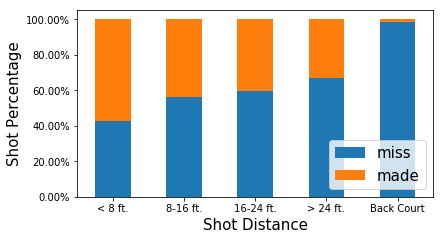

In [107]:
count_matrix1 = clean.groupby([ 'shot_zone_range','shot_made_flag'],sort=False).size().unstack()
ft8=count_matrix1.iloc[0].copy()
ft16=count_matrix1.iloc[1].copy()
ft0=count_matrix1.iloc[2].copy()
ft24=count_matrix1.iloc[3].copy()
ftback=count_matrix1.iloc[4].copy()

count_matrix1.iloc[0]=ft0
count_matrix1.iloc[1]=ft8
count_matrix1.iloc[2]=ft16
count_matrix1.iloc[3]=ft24
count_matrix1.iloc[4]=ftback

rowname=count_matrix1.index.values
rowname[0]='< 8 ft.'
rowname[1]='8-16 ft.'
rowname[2]='16-24 ft.'
rowname[3]='> 24 ft.'
rowname[4]='Back Court'

count_matrix_norm1 = count_matrix1.div(count_matrix1.sum(axis=1),axis=0)
ax = count_matrix_norm1.plot(kind='bar',stacked=True)#title='shot_zone_range')

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
#plt.figure(figsize=(3,5))
plt.tight_layout()
ax.legend(['miss','made'],loc = 'lower right',fontsize = 15)
ax.set_xlabel('Shot Distance',fontsize=15)
ax.set_ylabel('Shot Percentage',fontsize=15)
#plt.title('Shot Percentage v.s Shot Distance',fontsize=20)
#ax.set_xticklabels(rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
plt.savefig('figures/shot_distance_bar.pdf',dpdfpi=500,bbox_inches='tight')
plt.show()

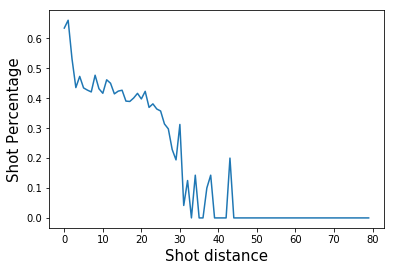

In [108]:
c = clean.groupby('shot_distance')['shot_made_flag'].mean()
plt.plot(np.array(c.index), c.values)
plt.xlabel('Shot distance',fontsize=15)
plt.ylabel('Shot Percentage',fontsize=15)
#plt.scatter(c.index, c.values)
plt.savefig('figures/shot_distance_line.pdf',dpi=300)
plt.show()

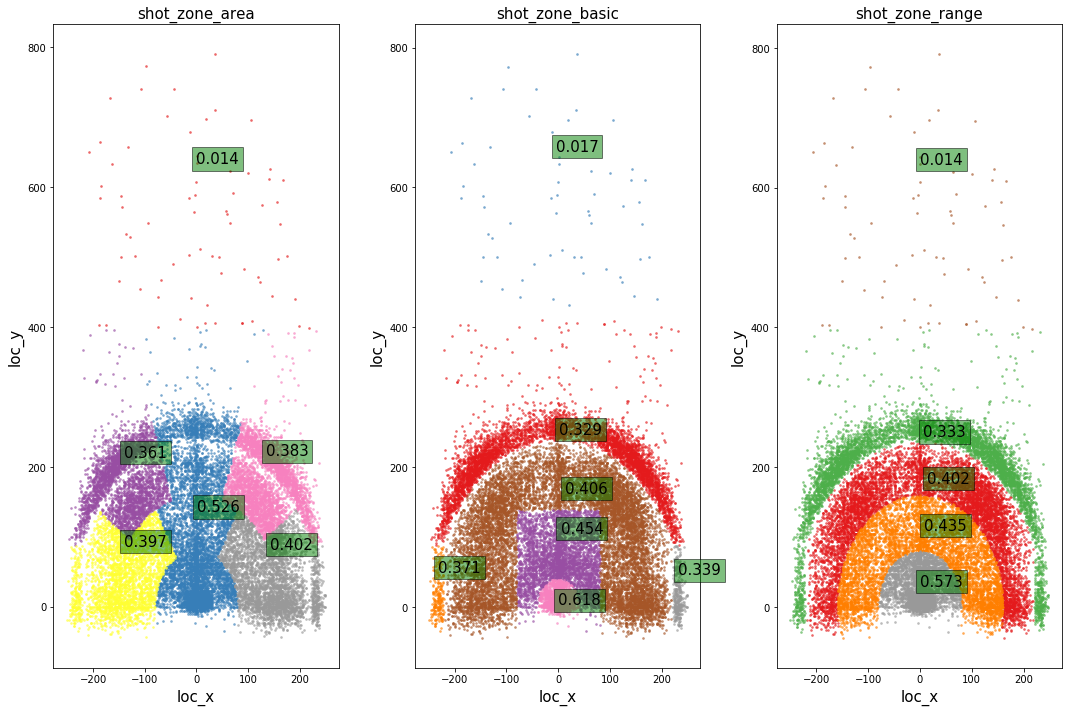

In [109]:
import matplotlib.cm as cm
#plt.figure(figsize=(5,10))

def grouped_plot(feature):
    c_mean = clean.groupby(feature)['shot_made_flag'].mean()

    groups = clean.groupby(feature)
    colors = cm.Set1(np.linspace(0, 1, len(groups)))
    for g, c in zip(groups, colors):
        plt.scatter(g[1].loc_x, g[1].loc_y, color=c, s=3, alpha=0.5)
        
    for i, area in enumerate(clean[feature].unique()):
        c = clean.loc[(clean[feature]==area)]
        plt.text(c.loc_x.mean(), c.loc_y.quantile(0.80), '%0.3f'%(c_mean[area]),size=15, bbox=dict(facecolor='green', alpha=0.5))
plt.figure(figsize=(15,10))

plt.subplot(131)
plt.title('shot_zone_area',fontsize=15)
plt.xlabel('loc_x',fontsize=15)
plt.ylabel('loc_y',fontsize=15)
grouped_plot('shot_zone_area')
plt.tight_layout()
plt.savefig('figures/shot_zone_area.png',dpi=500)

plt.subplot(132)
plt.title('shot_zone_basic',fontsize=15)
plt.xlabel('loc_x',fontsize=15)
plt.ylabel('loc_y',fontsize=15)
grouped_plot('shot_zone_basic')
plt.tight_layout()
plt.savefig('figures/shot_zone_basic.png',dpi=500)

plt.subplot(133)
plt.title('shot_zone_range',fontsize=15)
plt.xlabel('loc_x',fontsize=15)
plt.ylabel('loc_y',fontsize=15)
grouped_plot('shot_zone_range')
plt.tight_layout()
plt.savefig('figures/shot_zone_range.pdf',dpi=500)

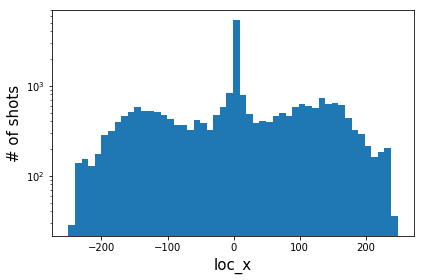

In [110]:
plt.hist(clean['loc_x'],bins=50,log=True)
#df['SalePrice'].hist(bins=30,log=True,grid=False)

# modify the properties of the figure
# axis labels, title, x and y limits, etc.
plt.xlabel('loc_x',fontsize=15)
plt.ylabel('# of shots',fontsize=15)
#plt.title('histogram of the target variable')
plt.tight_layout()

# show the figure in the notebook or save it as a file
plt.savefig('figures/loc_x_histogram.pdf',dpi=300)
plt.show()

In [13]:
df = pd.read_csv('data/data.csv')
df=df.dropna(subset=['shot_made_flag'])
df.shape[0]

25697

In [11]:
#import numpy as np 
#import pandas as pd 

#df = pd.read_csv('data/data.csv')
#df=df.dropna(subset=['shot_made_flag'])
#df.index = range(len(df))

#df['numeric_season'] = 1

#for row in range(0,(df.shape[0]-1),1):
    #df['numeric_season'].loc[row] = df.season[row][len(df.season[row])-2:len(df.season[row])]  

In [7]:
#df.to_csv('data/EDA3.csv',index=False)

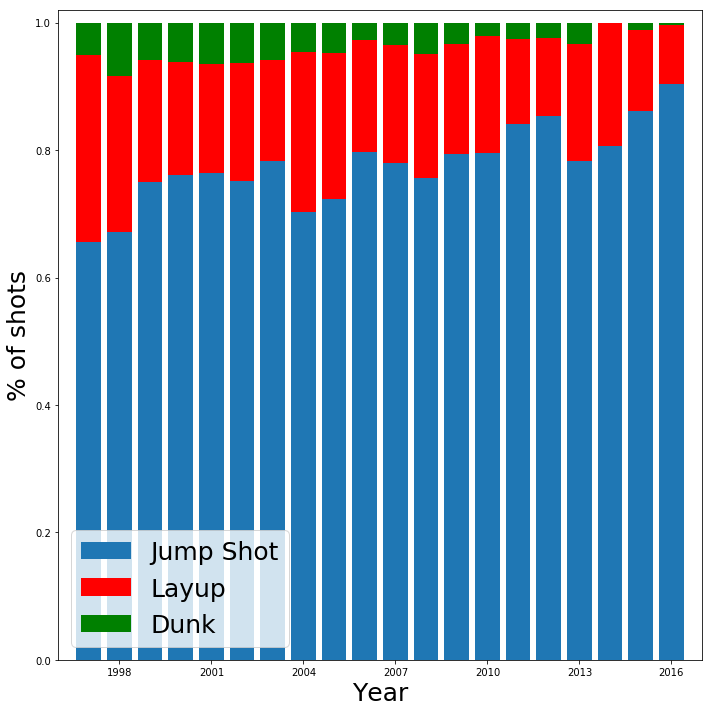

In [114]:
df = pd.read_csv('data/EDA3.csv')

from matplotlib import pylab as plt

shot_type = dict()
types = np.unique(df.combined_shot_type)
years = [97,98,99,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for s_type in types:
    
    temp = list(range(len(years)))
    ind = 0
    
    for year in years:
        temp[ind] = np.true_divide(len(df[(df.combined_shot_type==s_type) & (df.numeric_season == year)]),len(df[df.numeric_season==year]))
        ind = ind + 1
              
    shot_type[s_type] = temp
    
plot_years = np.linspace(1997,2016,20)

row_sum = []
for i in range(0, len(shot_type['Jump Shot'])):
    row_sum.append(shot_type['Jump Shot'][i]+shot_type['Layup'][i]+shot_type['Dunk'][i])
    shot_type['Jump Shot'][i] = shot_type['Jump Shot'][i]/row_sum[i]
    shot_type['Layup'][i] = shot_type['Layup'][i]/row_sum[i]
    shot_type['Dunk'][i] = shot_type['Dunk'][i]/row_sum[i]

    
plt.figure(figsize = (10,10))
plt.bar(plot_years,shot_type['Jump Shot'])
plt.bar(plot_years,shot_type['Layup'],bottom =shot_type['Jump Shot'], color = 'r' )  
bot = np.add(shot_type['Jump Shot'] ,shot_type['Layup'])
plt.bar(plot_years,shot_type['Dunk'],bottom = bot,color = 'g')  
plt.xlabel('Year',fontsize=25)
plt.ylabel('% of shots',fontsize=25)
plt.legend(['Jump Shot','Layup','Dunk'],loc = 3,fontsize = 25)
#plt.title('Shot Type in career',fontsize=25)
plt.ylim([0,1.02])
plt.xlim([1996,2017])
plt.xticks(np.arange(1997,2017)[1::3])
plt.tight_layout()
plt.savefig('figures/shot_type.pdf',dpi=500)
plt.show()

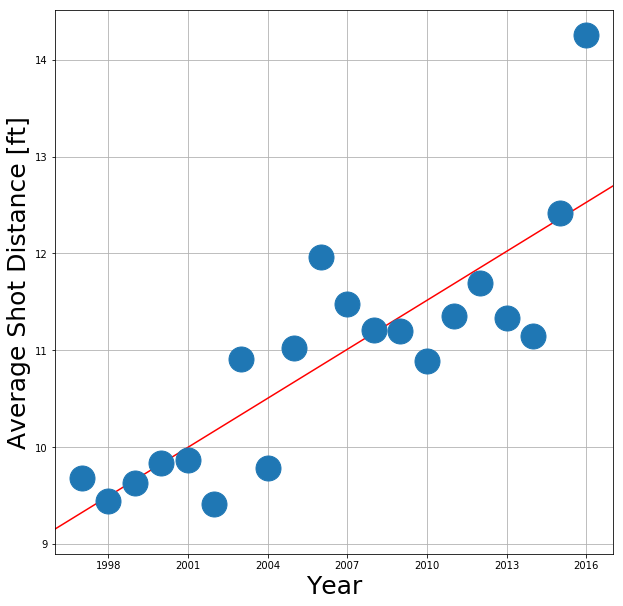

In [113]:
df['Dist'] = np.power(df.loc_x,2)+np.power(df.loc_y,2)
df['Dist'] = np.sqrt(df.Dist)
years = [97,98,99,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
ind = 0
avg_dist = years
for year in years:

    avg_dist[ind] = np.mean(df.Dist[df.numeric_season==year])
    ind = ind + 1
avg_dist = np.divide(avg_dist,41.6)
years = [1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
coff = np.polyfit(years,avg_dist, 1, rcond=None, full=False, w=None, cov=False)
x = np.linspace(1996,2018,100)
y = (np.multiply(coff[0],x) + coff[1])*3.28

plt.figure(figsize = (10,10))
plt.xlim([1996,2017])
plt.xlabel('Year',fontsize=25)
plt.ylabel('Average Shot Distance [ft]',fontsize=25)
plt.grid()
plt.plot(x,y,'r')
plt.plot(years,avg_dist*3.28,'o', markersize = 25)
plt.xticks(np.arange(1997,2017)[1::3])
plt.savefig('figures/shot_diatance_mean.pdf',dpi=500)
plt.show()